# How to Finetune Qwen 2.5 VL 7B and deploy to fireworks

### Pre-requisites
- 1 H100 GPU
  - Should work on 1 A100 GPU as well
- python

In [9]:
# Install dependencies
%pip install uv
%uv pip install datasets pillow scikit-learn

  Using cached uv-0.7.3-py3-none-macosx_11_0_arm64.whl.metadata (11 kB)
Using cached uv-0.7.3-py3-none-macosx_11_0_arm64.whl (15.6 MB)
Note: you may need to restart the kernel to use updated packages.
Using Python 3.10.16 environment at: /Users/aidando/miniconda3/envs/finetune-env-3
Audited 3 packages in 41ms
Note: you may need to restart the kernel to use updated packages.


In this example we'll fine-tune a model to classify apparel whether it's a shirt, pants, shoe, watches etc.

We'll use the [Fashion Product Images (Small)](https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small) dataset to do this. We'll use only 500 rows for the train set, 100 rows for the test set, and 100 rows for validation to demonstrate you don't need a huge amount of data to get results with fine-tuning.

{'id': 15970,
 'gender': 'Men',
 'masterCategory': 'Apparel',
 'subCategory': 'Topwear',
 'articleType': 'Shirts',
 'baseColour': 'Navy Blue',
 'season': 'Fall',
 'year': 2011.0,
 'usage': 'Casual',
 'productDisplayName': 'Turtle Check Men Navy Blue Shirt',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>}

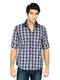

In [10]:
# Load dataset
from datasets import load_dataset
from IPython.display import display

dataset = load_dataset("ashraq/fashion-product-images-small")

# Sample a random row
display(dataset["train"][0])
dataset["train"][0]['image']

In [13]:
train_size=500
test_size=100
val_size=100

import pandas as pd
import numpy as np

# Convert to pandas for easier manipulation
df = pd.DataFrame(dataset["train"])
print(f"Original dataset size: {len(df)}")

# Set seed for reproducibility
np.random.seed(42)

# Simple random sampling
sample_df = df.sample(n=700)  # 500 + 100 + 100

# Split into train, test, and validation sets
train_df = sample_df.iloc[:train_size]
test_df = sample_df.iloc[train_size:train_size+test_size]
val_df = sample_df.iloc[train_size+test_size:train_size+test_size+val_size]

train_df.head()

Original dataset size: 44072


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
23665,4712,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Cambridge Analogue Black Dial Watch,<PIL.Image.Image image mode=RGB size=60x80 at ...
25543,10495,Women,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Flying Machine Women HS Blue Shirt,<PIL.JpegImagePlugin.JpegImageFile image mode=...
31934,49924,Women,Apparel,Saree,Sarees,Green,Fall,2012.0,Ethnic,Fabindia Green Maheshwari Maheshwari Zari Saree,<PIL.Image.Image image mode=RGB size=60x80 at ...
40422,42669,Women,Apparel,Topwear,Kurtas,Black,Summer,2012.0,Ethnic,Alma Women Black & White Kurta,<PIL.JpegImagePlugin.JpegImageFile image mode=...
40669,21304,Women,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Celine Dion Women Brown Frame Sunglasses,<PIL.Image.Image image mode=RGB size=60x80 at ...
